# ABBA-BABA tests in *Canarium*

### import libraries

In [1]:
import ipyrad as ip
from ipyrad.analysis import baba

import numpy as np
import ipyparallel as ipp
import toyplot
import toyplot.pdf

print "ipyrad v.{}".format(ip.__version__)

ipyrad v.0.5.15


### Spin up an ipyparallel cluster

In [2]:
## connect to ipcluster parallel client
ipyclient = ipp.Client()
print ip.cluster_info()

  host compute node: [4 cores] on oud


### Input files
This is the ipyrad `.loci` input file and a newick tree string that we will use for plotting results. 

In [3]:
handle = "/home/deren/Documents/Canarium-GBS/CanEnd_outfiles/CanEnd.loci"
newick = "/home/deren/Dropbox/Canarium_GBS/ipyrad/analysis_raxml/RAxML_bestTree.Can2_tree"

### A dictionary mapping sample names to clade names

In [4]:
tree = {
    
    "OG": ["D14269", "D13374", "SFC1988", "D13852"],
    
    "K1": ["SF328", "SF175", "SF200", "D13052", "SF209", 
           "SF172", "D14528", "SF286", "SF276"],
    
    "K2": ["D14483", "D14482", "D13101", "D13103"],
    
    "K3": ["D14504", "D14506", "D14505"],
    
    "K4": ["D14501", "D14478", "D14480", "D14485", "D14513", "D14477"],
    
    "K5": ["D13090", "D12950"],
    
    "K6": ["D12963", "SF155", "SF224", "SF228", "5573", 
           "SF327", "SF160", "SF153", "SF164", "SF197", 
           "D13097", "D13075", "D13063", "D13053"],
}

## Setup tests
The list below (`tests_K1`) records the tests we plan to evaluate. Each test is described by a dictionary in which the keys designate tips in the abba/baba test (e.g., p1, p2, p3, p4), and the values are a list of Sample names to represent each tip. For example, p4 is the outgroup, which here is the list described by `tree["OG"]` from above. Using dictionaries in this way makes writing the tests a bit cleaner and easier to read.  

### Setup tests: K1 -> x

In [5]:
tests_K1 = [
    {
     'p4': tree["OG"],
     'p3': tree["K1"],
     'p2': tree["K2"],
     'p1': tree["K3"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K3"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"] + tree["K3"] + tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K3"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    }, 
]

### Setup tests (K2, K3, K4) -> x

In [6]:
tests_K2 = [
    {
    'p4': tree["OG"],
    'p3': tree["K2"] + tree["K3"] + tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"] + tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"] + tree["K3"] + tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"] + tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    }, 
]

### Setup tests (K5,K6) -> x

In [7]:
tests_K3 = [
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K6"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K3"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K3"],
    'p1': tree["K4"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
]

### Run all the tests

In [8]:
res1, boots1 = baba.batch(handle, tests_K1, 1, 1000, ipyclient)
res2, boots2 = baba.batch(handle, tests_K2, 1, 1000, ipyclient)
res3, boots3 = baba.batch(handle, tests_K3, 1, 1000, ipyclient)

  [####################] 100%  calculating D-stats  | 0:05:32 |  
  [####################] 100%  calculating D-stats  | 0:04:48 |  
  [####################] 100%  calculating D-stats  | 0:03:52 |  


In [8]:
boots1 = np.loadtxt("boots1.npy")
boots2 = np.loadtxt("boots2.npy")
boots3 = np.loadtxt("boots3.npy")
allboots = np.loadtxt("allboots.npy")

In [9]:
print "tests P3 = K1"
print res1
print "\ntests P3 = K2,K3,K4"
print res2
print "\ntests P3 = K5,K6"
print res3

tests P3 = K1


NameError: name 'res1' is not defined

In [9]:
## combine test dicts and boots arrays
alltests = tests_K1 + tests_K2 + tests_K3
allboots = np.concatenate([boots1, boots2, boots3])

## save the boots arrays
np.savetxt("boots1.npy", boots1)
np.savetxt("boots2.npy", boots2)
np.savetxt("boots3.npy", boots3)
np.savetxt("allboots.npy", allboots)

## Plot results

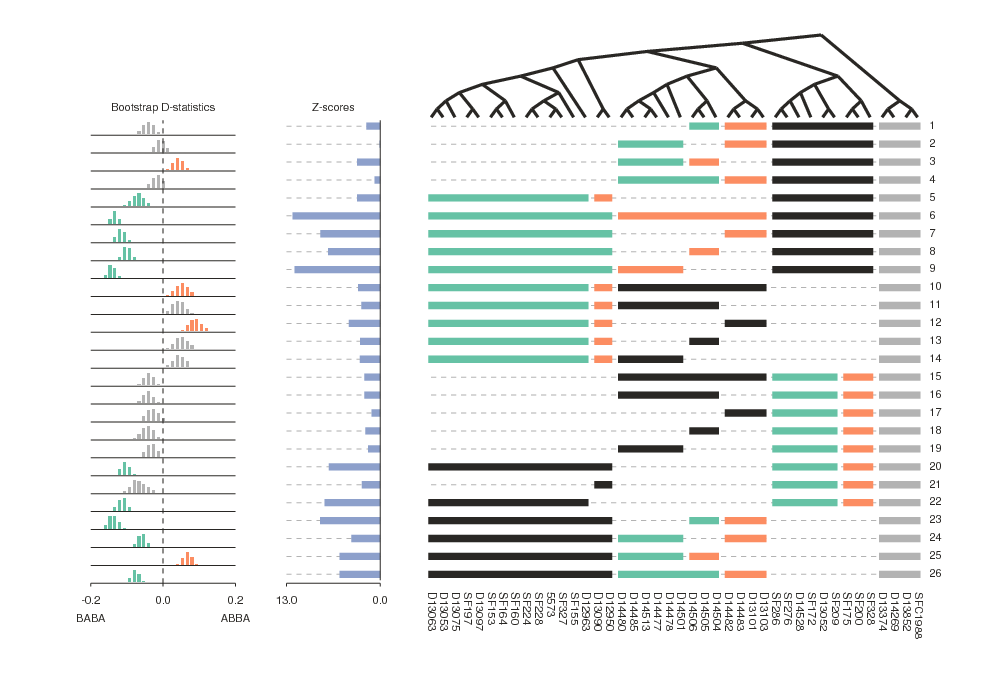

In [10]:
## load the tree 
tre = baba.Tree(newick)

## plot with boots and several styling args
canvas, axes = tre.draw(    
                     taxdicts=alltests,
                     bootsarr=allboots,
                     height=700,
                     width=1000,
                     use_edge_lengths=False,
                     vlshow=False,
                     vsize=0,
                     show_tips=True,
                     pct_tree_y=0.15,
                     cex="11px", 
                     test_labels=True,
                    )

## save plot as PDF 
toyplot.pdf.render(canvas, "dstats_full.pdf")

## embed in notebook
canvas

### Additional tests

#### test K1 without SF172

In [11]:
## tests with p3=K1
alt_K1 = [
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K3"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K3"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"] + tree["K3"] + tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K3"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    }, 
]

In [12]:
## tests with p3=K1
alt_K2 = [
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K2"],
    'p1': tree["K3"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K3"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K2"] + tree["K3"] + tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K2"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K3"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': ["SF172"],
    'p2': tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    }, 
]

In [13]:
## tests with p3=K1
alt_K3 = [
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][:3], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][3:5], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][-3:], 
    },    
    {
    'p4': tree["OG"],
    'p3': tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][:3], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][3:5], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K6"],
    'p2': ["SF172"],
    'p1': tree["K1"][-3:], 
    },    
    {
    'p4': tree["OG"],
    'p3': tree["K5"],
    'p2': ["SF172"],
    'p1': tree["K1"][:3], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K5"],
    'p2': ["SF172"],
    'p1': tree["K1"][3:5], 
    },
    {
    'p4': tree["OG"],
    'p3': tree["K5"],
    'p2': ["SF172"],
    'p1': tree["K1"][-3:], 
    },        
]

In [32]:
res4, boots4 = baba.batch(handle, alt_K1, 1, 1000, ipyclient)
res5, boots5 = baba.batch(handle, alt_K2, 1, 1000, ipyclient)
res6, boots6 = baba.batch(handle, alt_K3, 1, 1000, ipyclient)

  [####################] 100%  calculating D-stats  | 0:04:58 |  
  [####################] 100%  calculating D-stats  | 0:04:20 |  
  [####################] 100%  calculating D-stats  | 0:04:02 |  


In [38]:
## save the boots arrays
np.savetxt("boots4.npy", boots4)
np.savetxt("boots5.npy", boots5)
np.savetxt("boots6.npy", boots6)

In [14]:
boots4 = np.loadtxt("boots4.npy")
boots5 = np.loadtxt("boots5.npy")
boots6 = np.loadtxt("boots6.npy")

In [33]:
print "tests P3 = K3 w/o SF172"
print res4
print "\ntests P3 = SF172"
print res5
print "\ntests P1 = SF172"
print res6

tests P3 = K3 w/o SF172
      dstat  bootmean   bootstd         ABBA         BABA         Z
0 -0.029810 -0.029495  0.017808  1124.072483  1193.149921  1.656297
1  0.004659  0.004718  0.015710  1276.961819  1265.119051  0.300307
2  0.044881  0.044960  0.014628  1333.905014  1219.314192  3.073504
3 -0.005510 -0.005183  0.014489  1358.357719  1373.409572  0.357710
4 -0.005496 -0.005813  0.021758   678.794849   686.297423  0.267187
5 -0.070296 -0.070627  0.010946  2314.306996  2664.284385  6.452101
6 -0.052254 -0.052835  0.013917  1690.022933  1876.381293  3.796348
7 -0.040248 -0.040032  0.014768  1745.755625  1892.174683  2.710654
8 -0.080046 -0.079927  0.012024  1996.646201  2344.106860  6.647067

tests P3 = SF172
      dstat  bootmean   bootstd        ABBA         BABA          Z
0 -0.097586 -0.097794  0.022068  643.159144   782.259838   4.431553
1 -0.059123 -0.058257  0.017343  729.417245   821.087731   3.359193
2  0.034184  0.034831  0.018468  773.219792   722.103125   1.886004
3 -0.0

In [15]:
## combine test dicts and boots arrays
alts = alt_K1 + alt_K2 + alt_K3
altboots = np.concatenate([boots4, boots5, boots6])

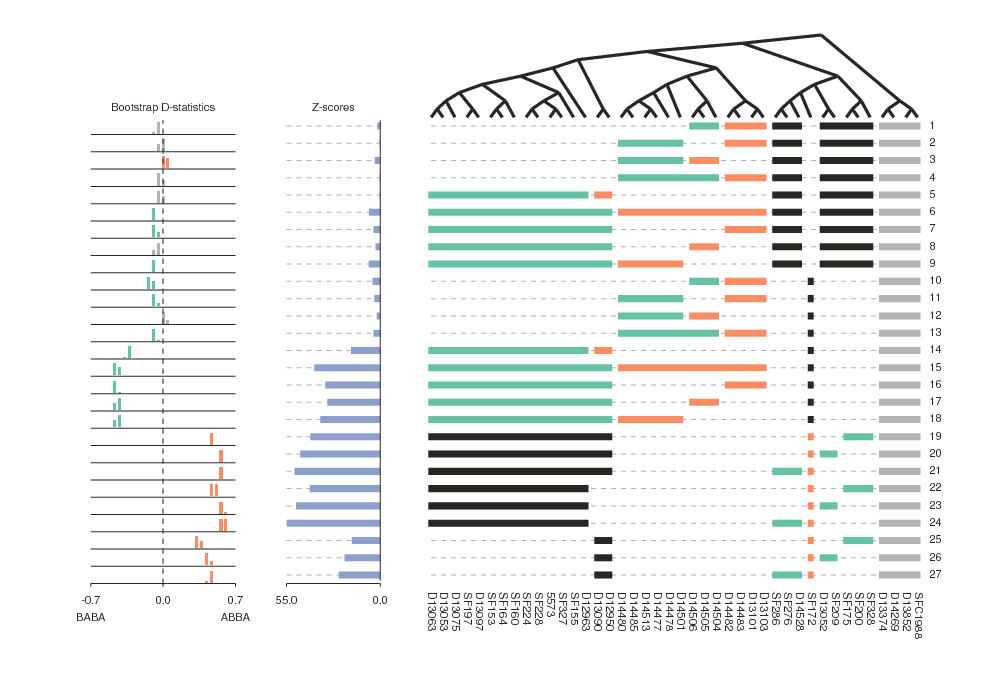

In [17]:
## load the tree 
tre = baba.Tree(newick)

## plot with boots and several styling args
canvas, axes = tre.draw(    
                     taxdicts=alts,
                     bootsarr=altboots,
                     height=700,
                     width=1000,
                     use_edge_lengths=False,
                     vlshow=False,
                     vsize=0,
                     show_tips=True,
                     pct_tree_y=0.15,
                     cex="11px",
                     test_labels=True,
                    )
                    

## save plot as PDF 
toyplot.pdf.render(canvas, "dstats_SF172.pdf")

## embed in notebook
canvas

# Five taxon tests

In [22]:
tests5 = [
    ## 56 into 234
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K2"],
        "p1": tree["K3"] + tree["K4"]
    },
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K3"],
        "p1": tree["K4"]
    },
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K2"],
        "p1": tree["K4"]
    },
    
    ## 23 into 56
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K3"] + tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    }, 
    {
        "p5": tree["OG"],
        "p4": tree["K3"],
        "p3": tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    },    
    
    ## 56 into 1
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },     
    ## 1 into 56
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K5"],
        "p1": tree["K6"],
    },
    ## 234 into 1
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K3"] + tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },        
    {
        "p5": tree["OG"],
        "p4": tree["K3"],
        "p3": tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },   
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },   
    ## 1 into 234
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K2"],
        "p1": tree["K3"] + tree["K4"],
    },
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K2"],
        "p1": tree["K4"],
    },
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K3"],
        "p1": tree["K4"],
    },
]

### (6,5) into (2,3,4)
Test 1: (6,5),(2,34) shows that (6,5) and (6) share more alleles with 34.

In [23]:
r, b = baba.baba(handle, tests5[0], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.014884  0.014197  0.044072  117.547811  114.099975  0.337721
p4     -0.136973 -0.135956  0.029056  178.815831  235.576464  4.714173
shared -0.123482 -0.122702  0.017400  600.430351  769.605361  7.096764


Test 2: (6,5),(3,4) shows that **neither** (6) or (5) share more alleles with 3 than 4.

In [24]:
r, b = baba.baba(handle, tests5[1], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.020573  0.020171  0.048261  103.793924   99.609288  0.426285
p4     -0.016166 -0.016372  0.028560  197.342973  203.828186  0.566018
shared  0.048214  0.048358  0.017784  681.428002  618.741048  2.711105


Test 3: (6,5),(2,4) shows that (6,5) and (6) share more alleles with 4 than 2. 

In [25]:
r, b = baba.baba(handle, tests5[2], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.024557  0.023461  0.044493  112.429861  107.040365  0.551925
p4     -0.138169 -0.139897  0.028961  172.299183  227.545426  4.770936
shared -0.112041 -0.112109  0.018559  588.279308  736.735988  6.037181


### (2,3,4) into (6,5)

Test 4: (2,34),(5,6) shows that (2,34) and (34) share more with 6.

In [26]:
r, b = baba.baba(handle, tests5[3], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.015164  0.014734  0.029431  216.977369  210.494987  0.515248
p4      0.161886  0.159897  0.050169   90.179858   65.050273  3.226791
shared  0.076769  0.076528  0.019692  695.581961  596.398061  3.898547


Test 5: (3,4),(5,6) shows that **neither** (3) or (4) share more alleles with (5) than (6), but that their ancestor (3,4) shares more with 6

In [27]:
r, b = baba.baba(handle, tests5[4], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.023178  0.023151  0.030221  185.607943  177.198869  0.766956
p4     -0.022387 -0.022172  0.051474   88.511118   92.564806  0.434916
shared  0.068231  0.067909  0.019466  698.438558  609.216352  3.505139


Test 6: (2,4)(5,6) shows that (2,4) ancestor shares more with 6 than 4, and that it is derived from 4. 

In [28]:
r, b = baba.baba(handle, tests5[5], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.003032  0.001794  0.030458  206.464774  205.216712  0.099535
p4      0.127722  0.125394  0.049131   98.645780   76.301177  2.599644
shared  0.078385  0.079040  0.019410  674.386984  576.348156  4.038421


In [ ]:
Test 7: 

In [29]:
r, b = baba.baba(handle, tests5[6], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.224730 -0.224970  0.026955  135.508381  214.068815  8.337333
p4      0.148981  0.144304  0.075630   61.362847   45.449826  1.969872
shared -0.136250 -0.136322  0.020053  477.681324  628.382062  6.794468


In [30]:
r, b = baba.baba(handle, tests5[7], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.279560 -0.280100  0.035937  102.409026  181.886757  7.779203
p4      0.170526  0.170411  0.047511   93.228725   66.064944  3.589175
shared -0.046781 -0.046576  0.021491  581.520925  638.599331  2.176790


In [31]:
r, b = baba.baba(handle, tests5[8], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.031103 -0.032477  0.029702  230.034760  244.803431  1.047142
p4      0.036086  0.034190  0.047142  124.551061  115.875019  0.765476
shared -0.023346 -0.021850  0.016528  860.771462  901.923311  1.412525


In [32]:
r, b = baba.baba(handle, tests5[9], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.019073  0.020924  0.028838  209.930778  202.072552  0.661387
p4     -0.038672 -0.037744  0.048679  123.054577  132.955097  0.794437
shared -0.028525 -0.028325  0.017384  862.253902  912.889159  1.640834


In [33]:
r, b = baba.baba(handle, tests5[10], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.016778 -0.015952  0.027926  217.283946  224.699348  0.600778
p4      0.037463  0.035530  0.042373  135.045988  125.292863  0.884129
shared -0.019201 -0.019226  0.016899  826.833783  859.207159  1.136197


In [36]:
r, b = baba.baba(handle, tests5[11], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3     -0.074715 -0.075751  0.033275   181.655396   210.992256  2.245391
p4      0.010890  0.011415  0.039399   159.256450   155.825076  0.276417
shared -0.006835 -0.005822  0.015384  1114.402209  1129.741405  0.444308


In [37]:
r, b = baba.baba(handle, tests5[12], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3     -0.057811 -0.058458  0.032169   172.949148   194.172837  1.797079
p4     -0.007537 -0.007802  0.040914   143.816985   146.001360  0.184215
shared  0.005155  0.004999  0.015473  1067.562956  1056.613164  0.333156


In [38]:
r, b = baba.baba(handle, tests5[13], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3      0.049331  0.048056  0.033878   199.462433   180.708310  1.456132
p4      0.017933  0.014512  0.039085   146.241493   141.088831  0.458818
shared  0.041381  0.041744  0.014982  1089.978629  1003.353528  2.762133


### 5-taxon tests focused on SF172

In [58]:
a = set(["SF172", "x", "y"]) - set(['x'])
#print list(a)

a = set([1, 2, 3, 3, 3, 3, 3])

a = 'a'
b = ['a']
c = set(['a'])
d = {'a': 3}
e = ('a', 'b')

In [61]:
tests_s172 = [
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": ["SF172"],
        "p1": tree["K1"][3:],
    },     
    
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": tree["K1"][:3],
        "p1": list(set(tree["K1"][3:]) - set(["SF172"])),
    },     
    
    {
        "p5": tree["OG"],
        "p4": ["SF172"],
        "p3": tree["K1"][3:],
        "p2": tree["K5"],
        "p1": tree["K6"],
    },     
    
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": list(set(tree["K1"][3:]) - set(["SF172"])),
        "p2": tree["K5"],
        "p1": tree["K6"],
    },    
]

In [62]:
for test in tests_s172:
    r, b = baba.baba(handle, test, None, 1000)
    print r

           dstat  bootmean   bootstd       abxxa       baxxa          Z
p3      0.529442  0.529071  0.012076  402.835913  123.939217  43.844110
p4     -0.338586 -0.340124  0.053936   21.859288   44.239323   6.277518
shared  0.494379  0.494450  0.009721  966.825719  327.123723  50.857648
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.035002  0.033398  0.036335  133.170266  124.163022  0.963312
p4      0.093026  0.093003  0.078644   53.995486   44.804514  1.182875
shared  0.055287  0.055181  0.023037  476.628452  426.686931  2.399881
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.044947  0.043516  0.049921   35.899926   32.811531  0.900374
p4      0.000000  0.000000  0.000000    0.000000    0.000000       NaN
shared -0.144952 -0.144906  0.021039  529.779906  709.401540  6.889667
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.029531 -0.028191  0.052318   82.383315   87.397168  0.564463
p4

In [76]:
dissect_6 = [
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-5:],
        "p3": tree["K6"][-8:-5],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-13:-8],
        "p3": tree["K6"][-5:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-13:-8],
        "p3": tree["K6"][-8:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-5:-3],
        "p3": tree["K6"][-3:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },       
    
]


sarahtest = [
    {
    "p5": tree["OG"],
    "p4": ["D13053", "D13063"],
    "p3": ["D13075", "D13097", "SF197"],
    "p2": ["SF172"],
    "p1": tree["K1"][:3],
    },
    {
    "p5": tree["OG"],
    "p4": ["D13053", "D13063"],
    "p3": ["D13075", "D13097"],
    "p2": ["SF172"],
    "p1": tree["K1"][:3],
    }
]

In [67]:
r, b = baba.baba(handle, dissect_6[0], None, 1000)
print r

(           dstat  bootmean   bootstd        abxxa       baxxa          Z
 p3     -0.428367 -0.432014  0.055904    42.289931  105.671875   7.662541
 p4      0.679506  0.679834  0.018160   467.927662   89.293056  37.417257
 shared  0.622747  0.622678  0.011516  1847.845990  429.583201  54.076881,
 array([[-0.35698643, -0.43305132, -0.44395904, ..., -0.39538376,
         -0.44279815, -0.39668402],
        [ 0.68235846,  0.66818328,  0.67795275, ...,  0.67193147,
          0.66751724,  0.66965562],
        [ 0.61325924,  0.61931452,  0.61192804, ...,  0.61427417,
          0.59691098,  0.62850022]]))

In [70]:
r, b = baba.baba(handle, dissect_6[1], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.736138  0.736514  0.020792   401.852257   61.074248  35.404217
p4     -0.462107 -0.461950  0.029207    69.117187  187.875289  15.821847
shared  0.538387  0.538304  0.011627  1836.494163  551.063826  46.304365


In [71]:
r, b = baba.baba(handle, dissect_6[2], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.671538  0.672288  0.022034   339.584933   66.729311  30.476934
p4     -0.422836 -0.422645  0.034296    58.403993  143.978762  12.329014
shared  0.525331  0.525168  0.011951  1837.391855  571.779127  43.955880


In [73]:
r, b = baba.baba(handle, dissect_6[3], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3     -0.442401 -0.439735  0.066299    17.572917   45.457755   6.672838
p4      0.701066  0.701569  0.028777   198.305556   34.848958  24.362089
shared  0.676128  0.676150  0.014412  1092.743924  211.147049  46.914485


In [75]:
r, b = baba.baba(handle, sarahtest[0], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.699626  0.699496  0.028227   195.112269   34.482060  24.785372
p4     -0.430983 -0.434039  0.068936    17.322917   43.564236   6.251952
shared  0.675367  0.675318  0.014298  1087.000868  210.626215  47.234207
